In [15]:
%matplotlib inline
import json
import numpy as np
import glob
import matplotlib.pyplot as plt
import brewer2mpl
import math
import pandas as pd
import json_tricks

In [59]:
LOGDIR = '../results/'
PARAMS = [
'sarst_future_comp_1_inf_linear_True_True_1000_1',
'sarst_future_comp_1_inf_linear_True_True_1000_0.5',
'sarst_future_comp_1_inf_linear_True_True_1000_0.3',
          'sarst_future_comp_1_inf_linear_True_True_1000_2',
          'sarst_future_comp_1_inf_linear_True_True_1000_3'
]

In [60]:
frames = []
for PARAM in PARAMS:
    res_steps = glob.glob(LOGDIR + PARAM + '/*/' + 'log_steps/progress.json')
    for num_run, run in enumerate(res_steps):
        try:
            df = pd.read_json(run, lines=True)
        except ValueError:
            print("run "+run+": invalid")
        df['params'] = PARAM
        df['num_run']=num_run
        frames.append(df)
expe_res_steps = pd.concat(frames, ignore_index=True)
expe_res_steps

,Test reward on initial goal,Test reward on random goal,critic_loss,mean_Q_values,mean_action,mean_target_Q_values,mean_target_action,reference_action_grads,training_step,params,num_run
0,NaN,NaN,0.001297,-0.067116,-0.028083,-0.008340,0.002170,-0.003782,200,sarst_future_intervalC_1_inf_linear_True_True_...,0
1,NaN,NaN,0.000291,-0.072508,-0.724973,-0.012215,-0.015377,-0.044464,400,sarst_future_intervalC_1_inf_linear_True_True_...,0
2,NaN,NaN,0.000043,-0.099174,0.016561,-0.031339,-0.040362,-0.007886,600,sarst_future_intervalC_1_inf_linear_True_True_...,0
3,NaN,NaN,0.000011,-0.125498,-0.007009,-0.060301,-0.040821,0.018872,800,sarst_future_intervalC_1_inf_linear_True_True_...,0
4,-0.053508,-0.064265,0.000003,-0.148458,0.000175,-0.078833,-0.032388,-0.012554,1000,sarst_future_intervalC_1_inf_linear_True_True_...,0
5,-0.053508,-0.064265,0.000059,-0.160952,-0.013409,-0.092262,-0.026045,-0.027008,1200,sarst_future_intervalC_1_inf_linear_True_True_...,0
6,-0.053508,-0.064265,0.000050,-0.157066,-0.032791,-0.100011,-0.026876,-0.036783,1400,sarst_future_intervalC_1_inf_linear_True_True_...,0
7,-0.053508,-0.064265,0.000054,-0.154626,0.032462,-0.107029,-0.023768,-0.022082,1600,sarst_future_intervalC_1_inf_linear_True_True_...,0
8,-0.053508,-0.064265,0.000037,-0.155176,0.019530,-0.113982,-0.019494,-0.006880,1800,sarst_future_intervalC_1_inf_linear_True_True_...,0
9,-0.067548,-0.049263,0.000016,-0.153715,-0.012937,-0.121405,-0.017241,-0.002276,2000,sarst_future_intervalC_1_inf_linear_True_True_...,0


In [61]:
means_steps = expe_res_steps.groupby(['training_step','params']).mean()
means_steps.reset_index(level=['training_step', 'params'], inplace=True)
means_steps

,training_step,params,Test reward on initial goal,Test reward on random goal,critic_loss,mean_Q_values,mean_action,mean_target_Q_values,mean_target_action,reference_action_grads,num_run
0,200,sarst_future_intervalC_1_inf_linear_True_True_...,NaN,NaN,0.000352,-0.015122,-0.028145,-0.008719,0.002292,-0.000360,9.5
1,200,sarst_future_intervalC_1_inf_linear_True_True_...,NaN,NaN,0.000397,-0.023782,-0.031596,-0.008649,0.002265,-0.001071,9.5
2,200,sarst_future_intervalC_1_inf_linear_True_True_...,NaN,NaN,0.001349,-0.066676,-0.028084,-0.008331,0.002170,-0.003791,9.5
3,200,sarst_future_intervalC_1_inf_linear_True_True_...,NaN,NaN,0.001814,-0.101552,-0.027154,-0.008278,0.002373,-0.004808,9.5
4,200,sarst_future_intervalC_1_inf_linear_True_True_...,NaN,NaN,0.001791,-0.109838,-0.026776,-0.008225,0.002334,-0.004815,9.5
5,400,sarst_future_intervalC_1_inf_linear_True_True_...,NaN,NaN,0.000046,-0.018696,0.039083,-0.008231,-0.002494,0.003911,9.5
6,400,sarst_future_intervalC_1_inf_linear_True_True_...,NaN,NaN,0.000114,-0.038863,-0.455613,-0.010451,-0.010894,-0.002771,9.5
7,400,sarst_future_intervalC_1_inf_linear_True_True_...,NaN,NaN,0.000291,-0.071961,-0.724773,-0.011636,-0.015349,-0.044253,9.5
8,400,sarst_future_intervalC_1_inf_linear_True_True_...,NaN,NaN,0.000237,-0.097380,-0.712500,-0.012959,-0.013217,-0.031173,9.5
9,400,sarst_future_intervalC_1_inf_linear_True_True_...,NaN,NaN,0.000186,-0.104893,-0.682902,-0.013151,-0.013189,-0.021638,9.5


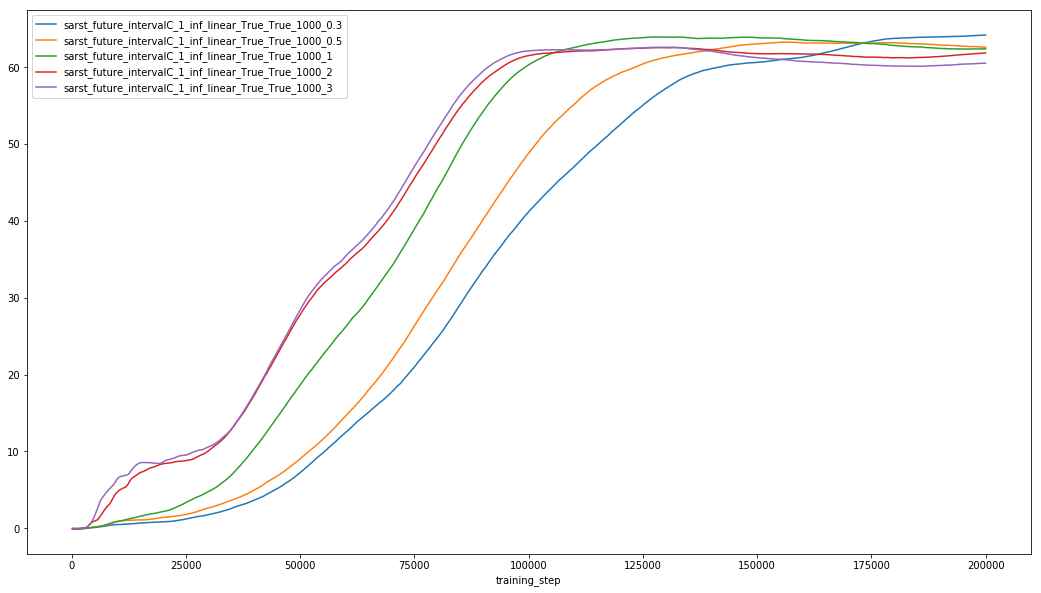

In [62]:
means_steps['mean_Q_values'] = means_steps.groupby('params')['mean_Q_values'].apply(lambda x: x.ewm(5).mean())
fig, ax = plt.subplots(figsize=(18,10))
for name, g in means_steps.groupby(['params'])[['training_step','mean_Q_values']]:
    g.plot(x='training_step',y='mean_Q_values', label=name, ax=ax)

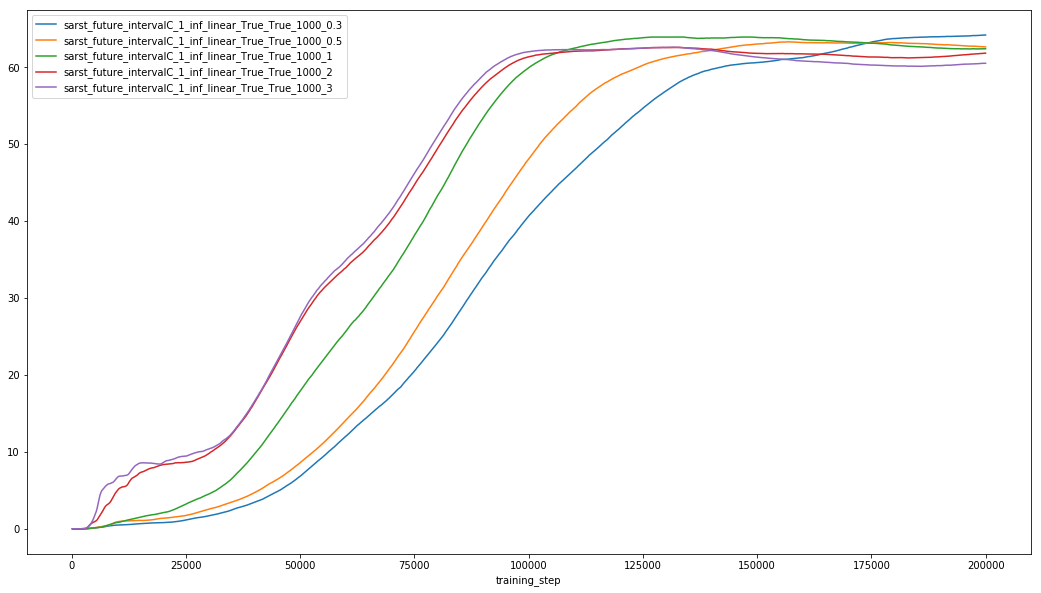

In [63]:
means_steps['mean_target_Q_values'] = means_steps.groupby('params')['mean_target_Q_values'].apply(lambda x: x.ewm(5).mean())
fig, ax = plt.subplots(figsize=(18,10))
for name, g in means_steps.groupby(['params'])[['training_step','mean_target_Q_values']]:
    g.plot(x='training_step',y='mean_target_Q_values', label=name, ax=ax)

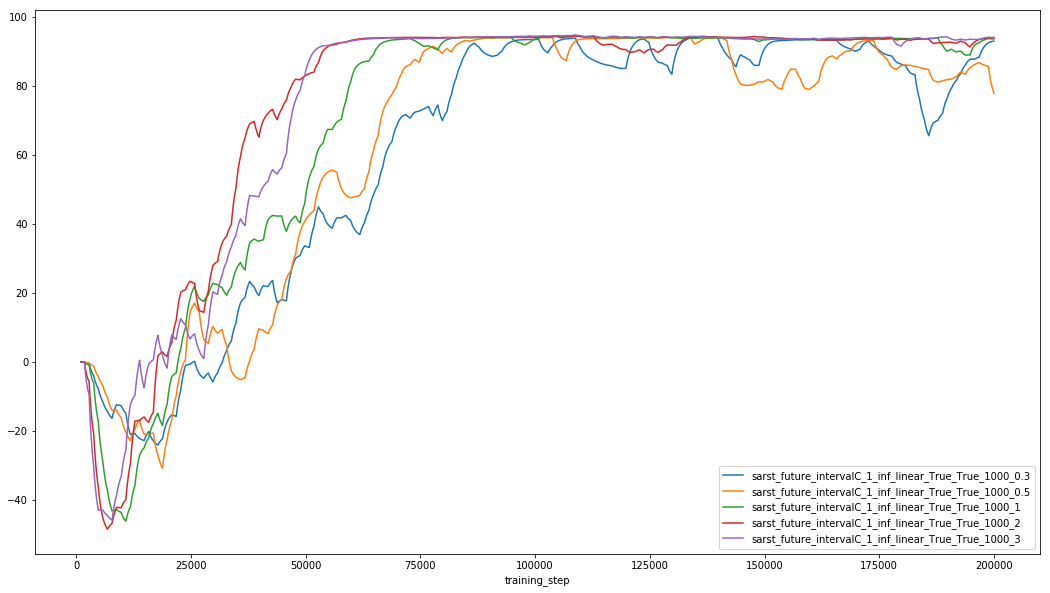

In [64]:
means_steps['Test reward on initial goal'] = means_steps.groupby('params')['Test reward on initial goal'].apply(lambda x: x.ewm(5).mean())
fig, ax = plt.subplots(figsize=(18,10))
for name, g in means_steps.groupby(['params'])[['training_step','Test reward on initial goal']]:
    g.plot(x='training_step',y='Test reward on initial goal', label=name, ax=ax)

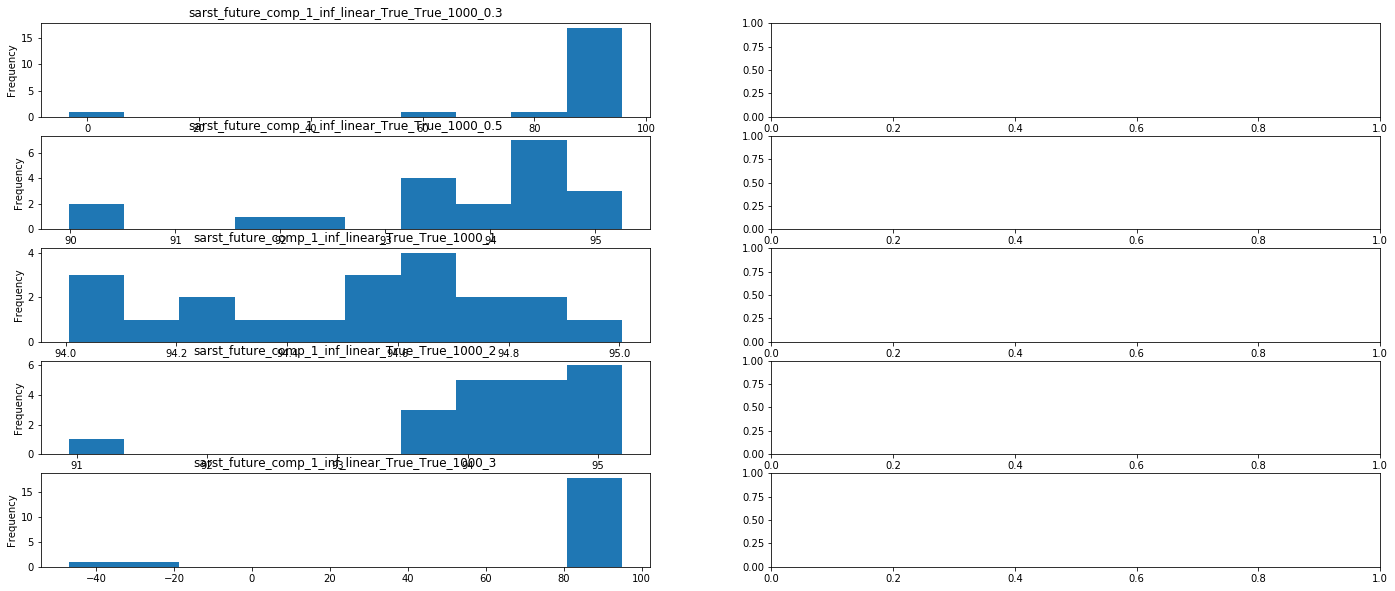

In [41]:
res_final = expe_res_steps[expe_res_steps['training_step']==200000]
fig, axes = plt.subplots(5,2, figsize=(24,10))
for i,(name, g) in enumerate(res_final.groupby('params')['Test reward on initial goal']):
    g.plot(kind='hist', title=name, ax=axes[i%5, i//5])

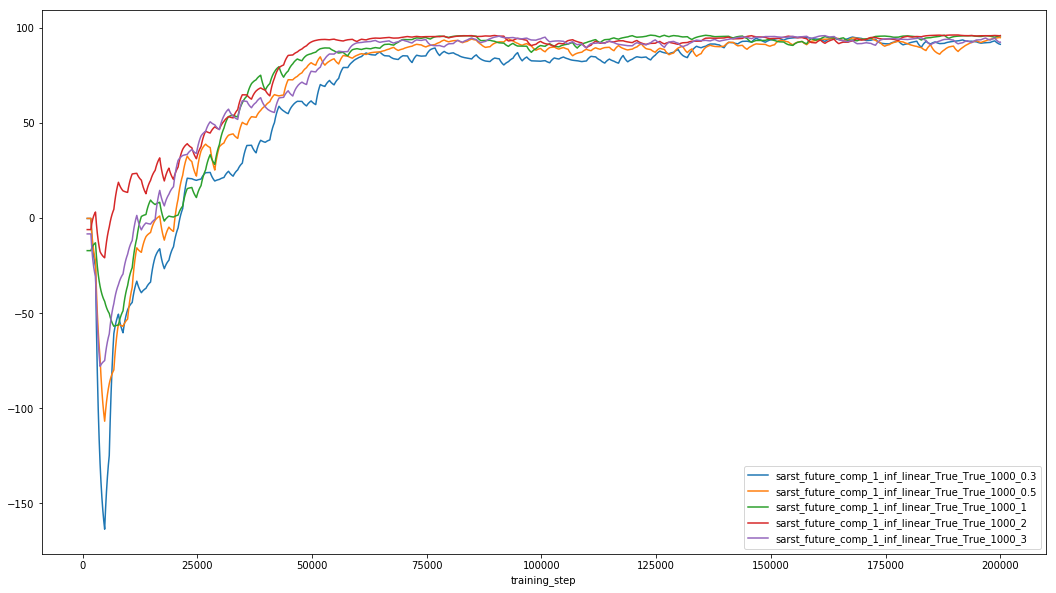

In [42]:
means_steps['Test reward on random goal'] = means_steps.groupby('params')['Test reward on random goal'].apply(lambda x: x.ewm(5).mean())
fig, ax = plt.subplots(figsize=(18,10))
for name, g in means_steps.groupby(['params'])[['training_step','Test reward on random goal']]:
    g.plot(x='training_step',y='Test reward on random goal', label=name, ax=ax)

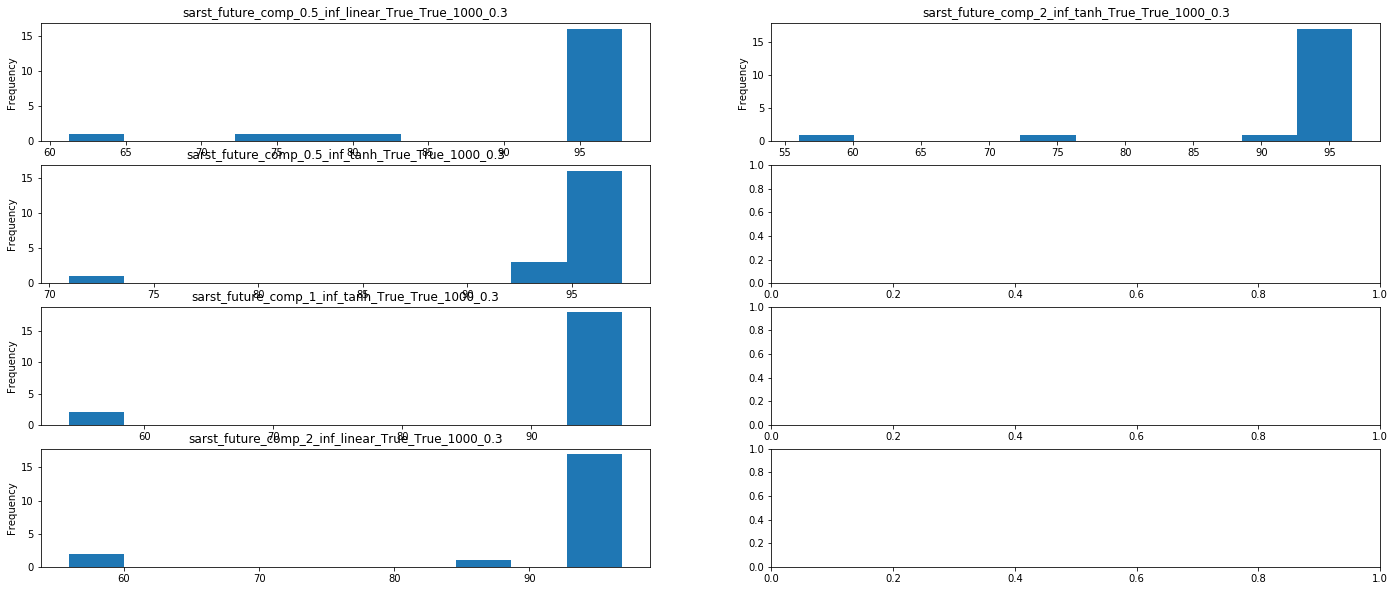

In [10]:
fig, axes = plt.subplots(4,2, figsize=(24,10))
for i,(name, g) in enumerate(res_final.groupby('params')['Test reward on random goal']):
    g.plot(kind='hist', title=name, ax=axes[i%4, i//4])

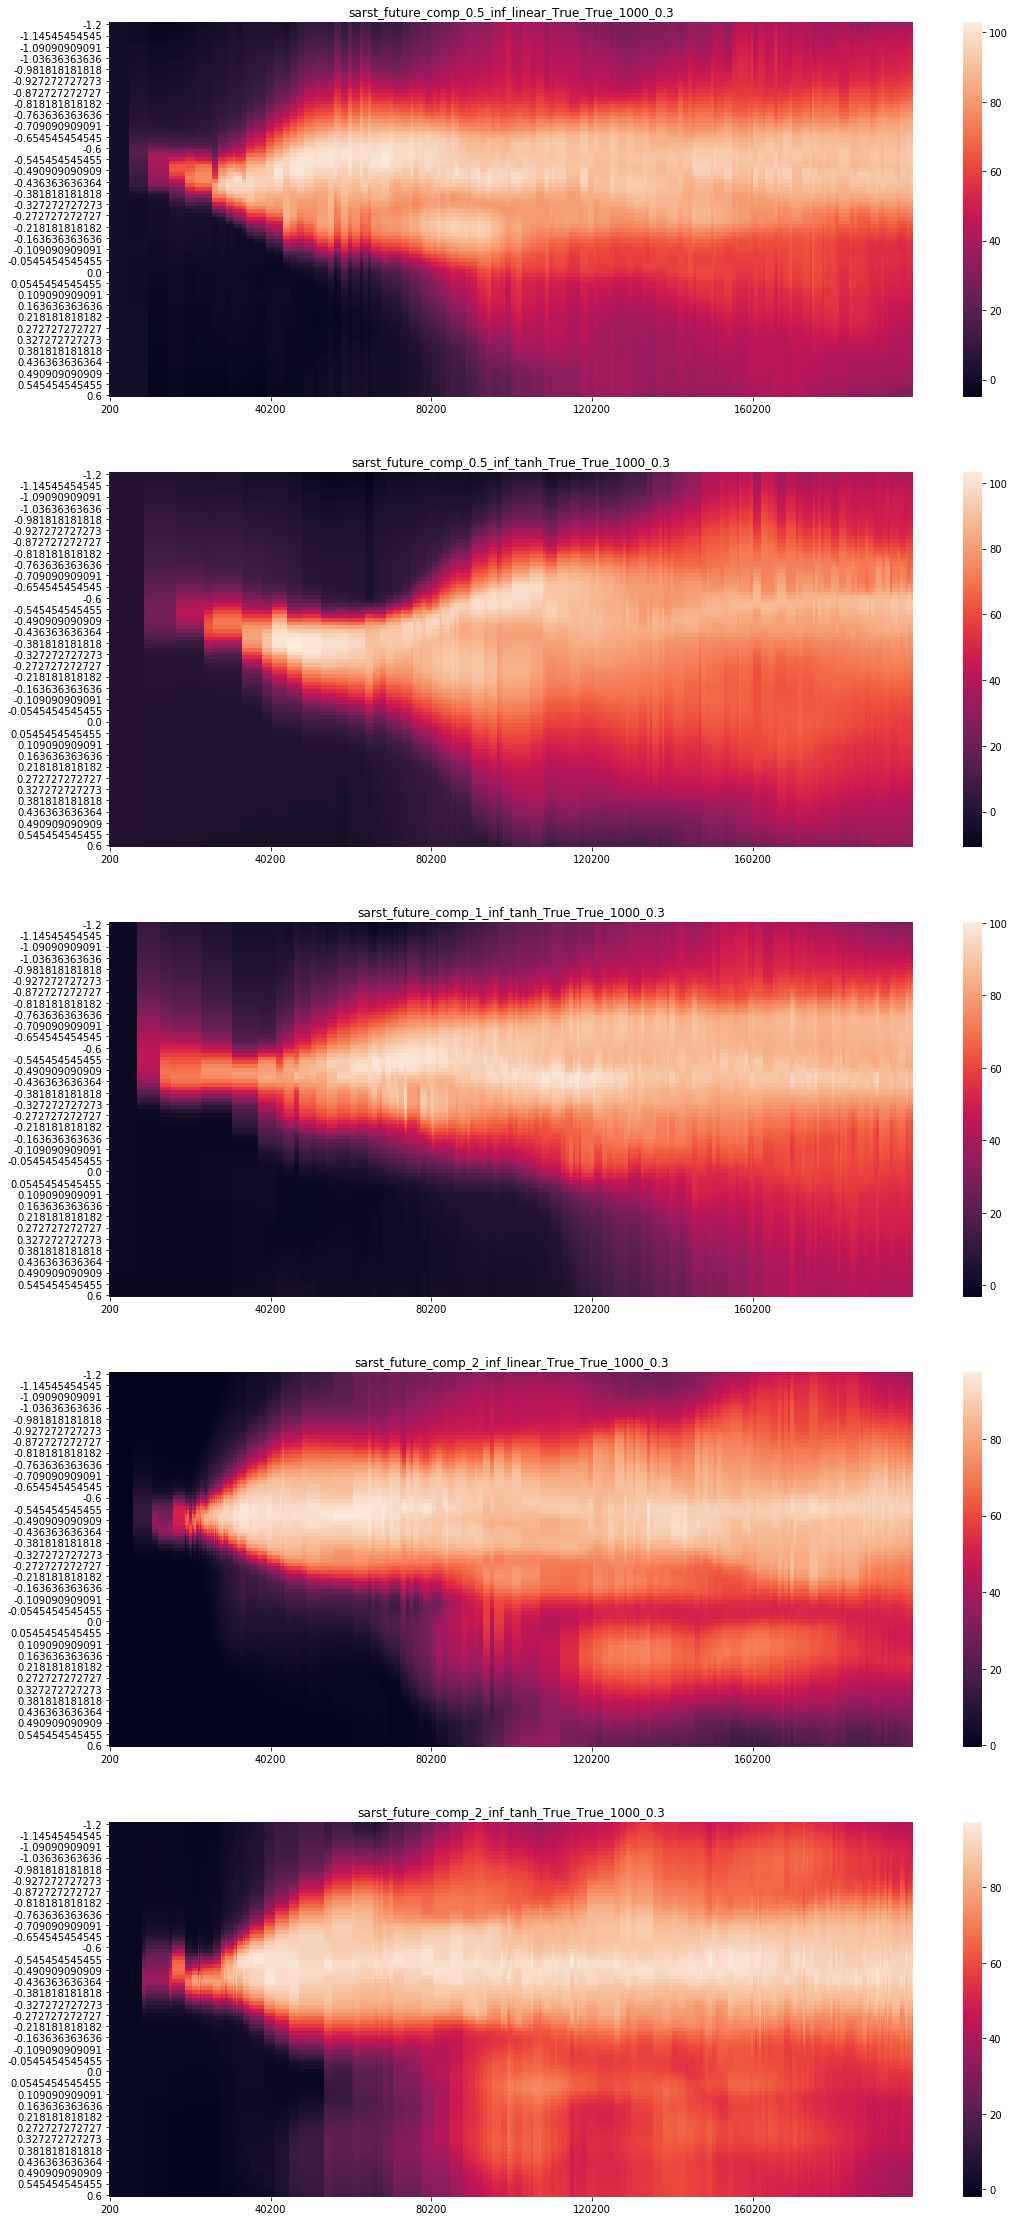

In [11]:
import seaborn as sns
fig, axes = plt.subplots(len(PARAMS), figsize=(18,40))
expe_res_steps_0 = expe_res_steps[expe_res_steps['num_run']==0]
for i, (name, g) in enumerate(expe_res_steps_0.groupby('params')):
    q_vals = g['q_values'].apply(pd.Series)
    heatmap = q_vals.T
    heatmap.columns = range(200, 200001,200)
    sns.heatmap(heatmap, ax=axes[i], xticklabels = 200)
    axes[i].set_title(name)
    axes[i].set_yticklabels([list(np.linspace(-1.2, 0.6, 100))[int(label.get_text())] for label in axes[i].get_yticklabels()])

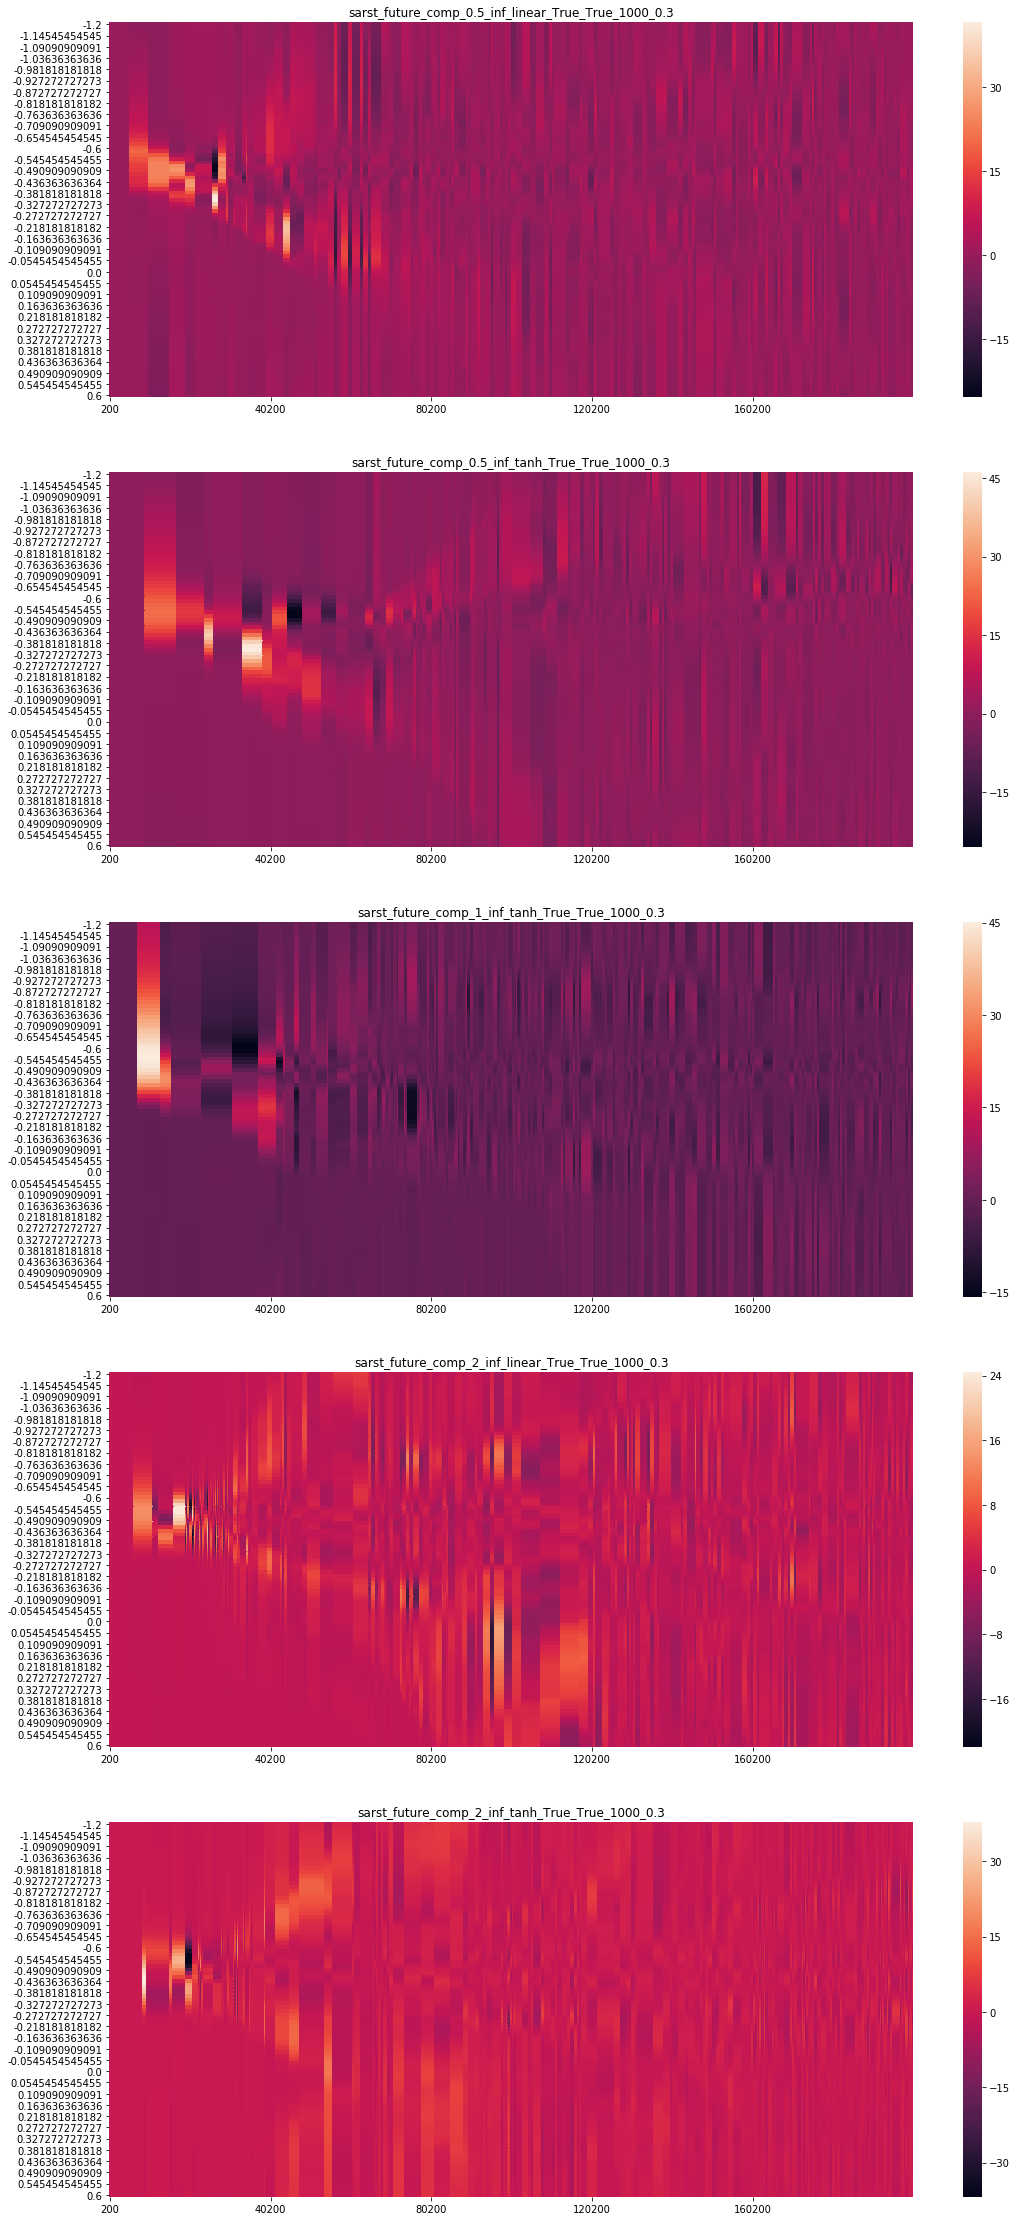

In [12]:
import seaborn as sns
fig, axes = plt.subplots(len(PARAMS), figsize=(18,40))
expe_res_steps_0 = expe_res_steps[expe_res_steps['num_run']==0]
for i, (name, g) in enumerate(expe_res_steps_0.groupby('params')):
    q_vals = g['d_q_values'].apply(pd.Series)
    heatmap = q_vals.T
    heatmap.columns = range(200, 200001,200)
    sns.heatmap(heatmap, ax=axes[i], xticklabels = 200)
    axes[i].set_title(name)
    axes[i].set_yticklabels([list(np.linspace(-1.2, 0.6, 100))[int(label.get_text())] for label in axes[i].get_yticklabels()])

In [14]:
frames = []
for PARAM in PARAMS:
    res_episodes = glob.glob(LOGDIR + PARAM + '/*/' + 'log_episodes/progress.json')
    for num_run, run in enumerate(res_episodes):
        try:
            df = pd.read_json(run, lines=True)
        except ValueError:
            print("invalid")
        df['params'] = PARAM
        df['num_run']=num_run
        frames.append(df)
expe_res_episodes = pd.concat(frames, ignore_index=True)
expe_res_episodes

,Duration,Episode,Episode steps,Goal,Goal reached,Start,Train reward,Train step,params,num_run
0,2.428090,1,200,0.563636,0,-0.454684,-0.349142,200,sarst_final_comp_0.1_inf_tanh_True_False_200,0
1,15.202794,2,200,0.000000,0,-0.465992,-3.050932,400,sarst_final_comp_0.1_inf_tanh_True_False_200,0
2,30.219414,3,194,-0.927273,1,-0.578419,90.672692,594,sarst_final_comp_0.1_inf_tanh_True_False_200,0
3,33.496388,4,38,-1.145455,2,-0.469028,96.463199,632,sarst_final_comp_0.1_inf_tanh_True_False_200,0
4,50.151190,5,200,-1.127273,2,-0.596522,-19.998104,832,sarst_final_comp_0.1_inf_tanh_True_False_200,0
5,58.514455,6,99,-1.090909,3,-0.593484,95.511802,931,sarst_final_comp_0.1_inf_tanh_True_False_200,0
6,84.976452,7,200,-0.109091,3,-0.418077,-20.000000,1131,sarst_final_comp_0.1_inf_tanh_True_False_200,0
7,96.862887,8,144,-0.254545,4,-0.489536,91.840820,1275,sarst_final_comp_0.1_inf_tanh_True_False_200,0
8,113.217108,9,200,-0.181818,4,-0.538099,-4.657094,1475,sarst_final_comp_0.1_inf_tanh_True_False_200,0
9,113.314449,10,1,-0.545455,5,-0.500332,99.900000,1476,sarst_final_comp_0.1_inf_tanh_True_False_200,0


In [34]:
expe_res_ep_plot

,Duration,Episode,Episode steps,Goal,Goal reached,Start,Train reward,Train step,params,num_run,train_interval
0,2.428090,1,200,0.563636,0,-0.454684,-0.349142,200,sarst_final_comp_0.1_inf_tanh_True_False_200,0,"(0, 1000]"
1,15.202794,2,200,0.000000,0,-0.465992,-3.050932,400,sarst_final_comp_0.1_inf_tanh_True_False_200,0,"(0, 1000]"
2,30.219414,3,194,-0.927273,1,-0.578419,90.672692,594,sarst_final_comp_0.1_inf_tanh_True_False_200,0,"(0, 1000]"
3,33.496388,4,38,-1.145455,2,-0.469028,96.463199,632,sarst_final_comp_0.1_inf_tanh_True_False_200,0,"(0, 1000]"
4,50.151190,5,200,-1.127273,2,-0.596522,-19.998104,832,sarst_final_comp_0.1_inf_tanh_True_False_200,0,"(0, 1000]"
5,58.514455,6,99,-1.090909,3,-0.593484,95.511802,931,sarst_final_comp_0.1_inf_tanh_True_False_200,0,"(0, 1000]"
6,84.976452,7,200,-0.109091,3,-0.418077,-20.000000,1131,sarst_final_comp_0.1_inf_tanh_True_False_200,0,"(1000, 2000]"
7,96.862887,8,144,-0.254545,4,-0.489536,91.840820,1275,sarst_final_comp_0.1_inf_tanh_True_False_200,0,"(1000, 2000]"
8,113.217108,9,200,-0.181818,4,-0.538099,-4.657094,1475,sarst_final_comp_0.1_inf_tanh_True_False_200,0,"(1000, 2000]"
9,113.314449,10,1,-0.545455,5,-0.500332,99.900000,1476,sarst_final_comp_0.1_inf_tanh_True_False_200,0,"(1000, 2000]"


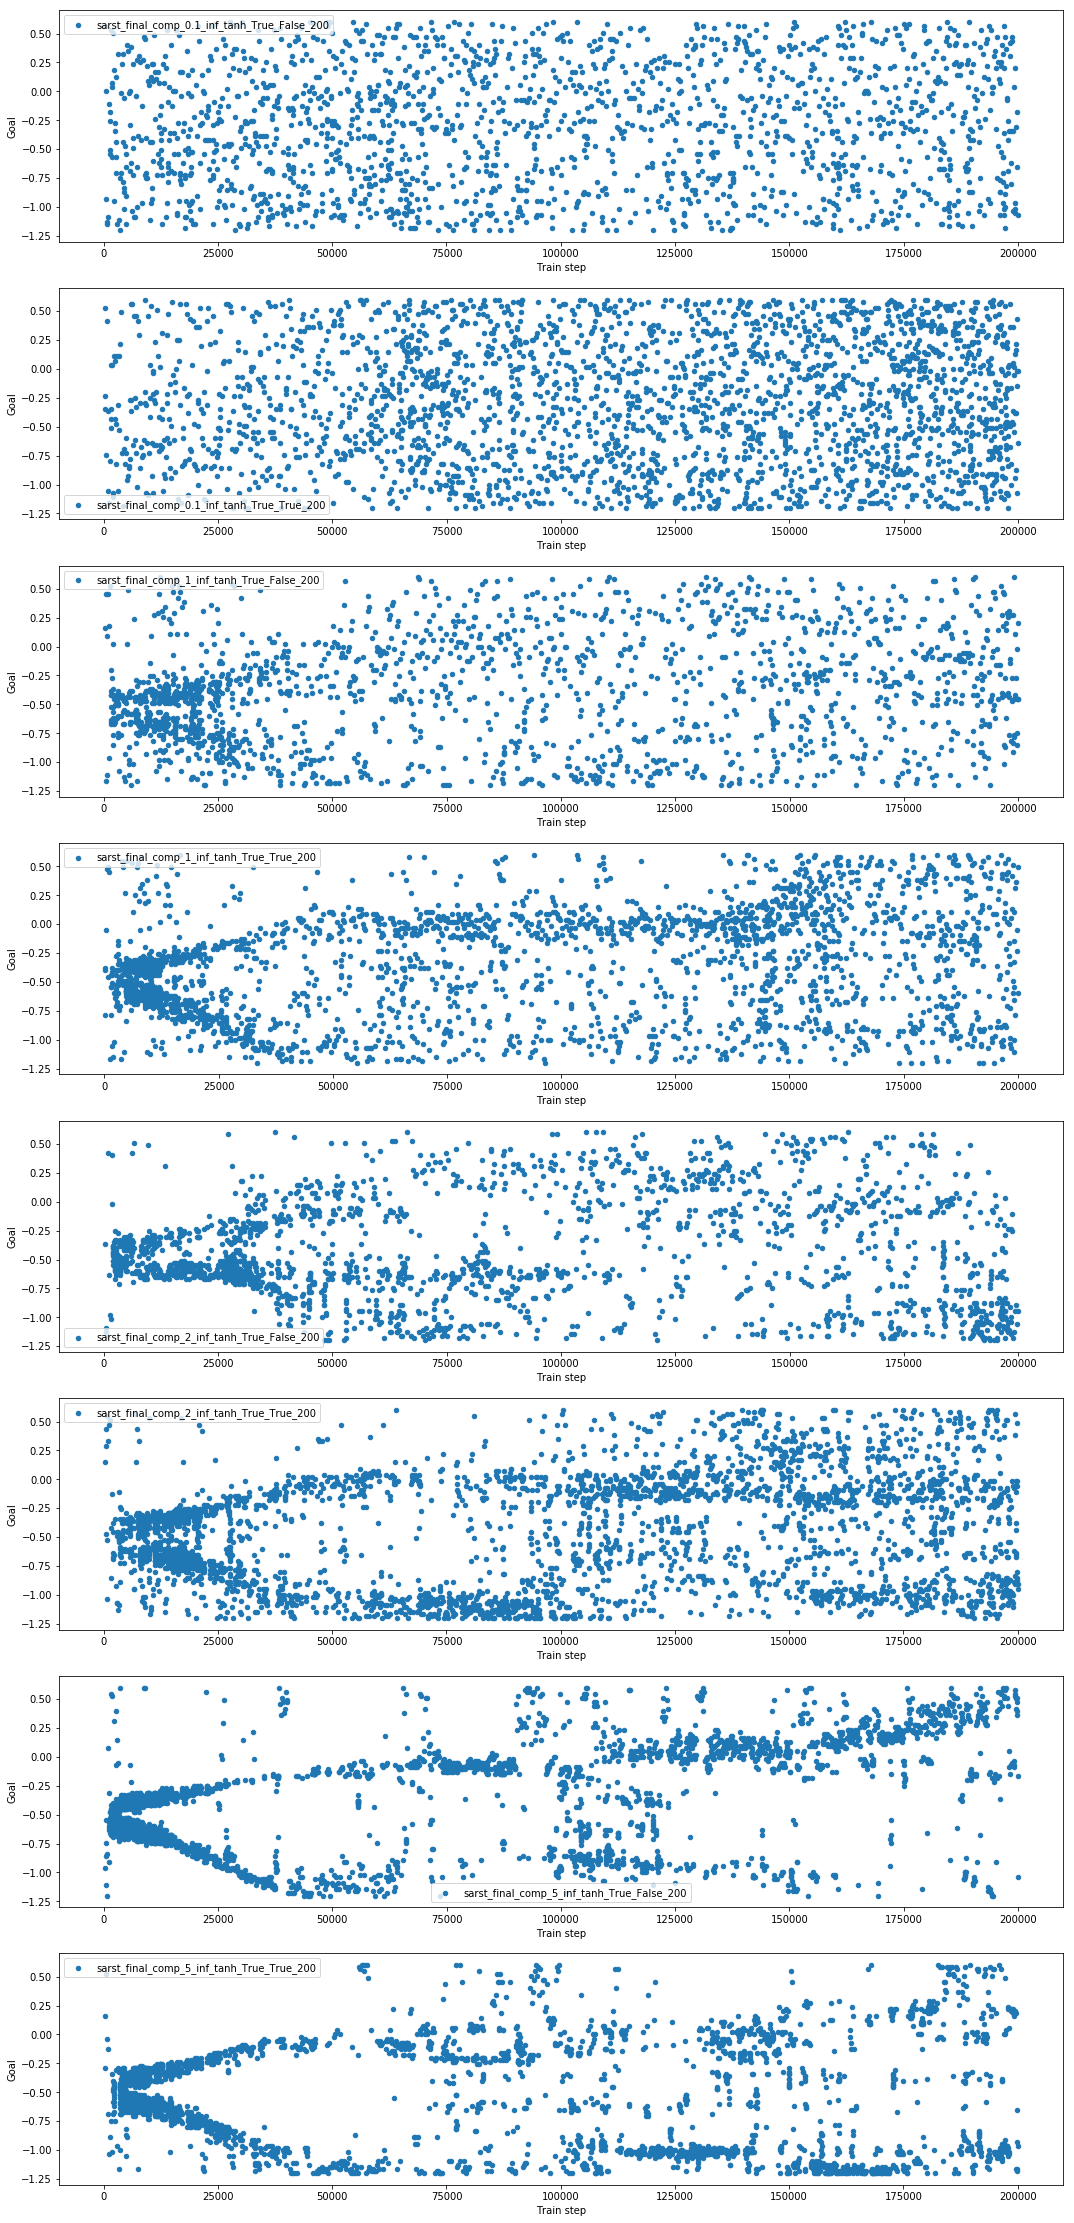

In [42]:
expe_res_ep_plot = expe_res_episodes[expe_res_episodes['num_run']==0]
fig, axes = plt.subplots(8, figsize=(18,40))
for i, (name, g) in enumerate(expe_res_ep_plot.groupby('params')):
    g.plot(x='Train step', y='Goal', label=name, ax=axes[i], kind='scatter')

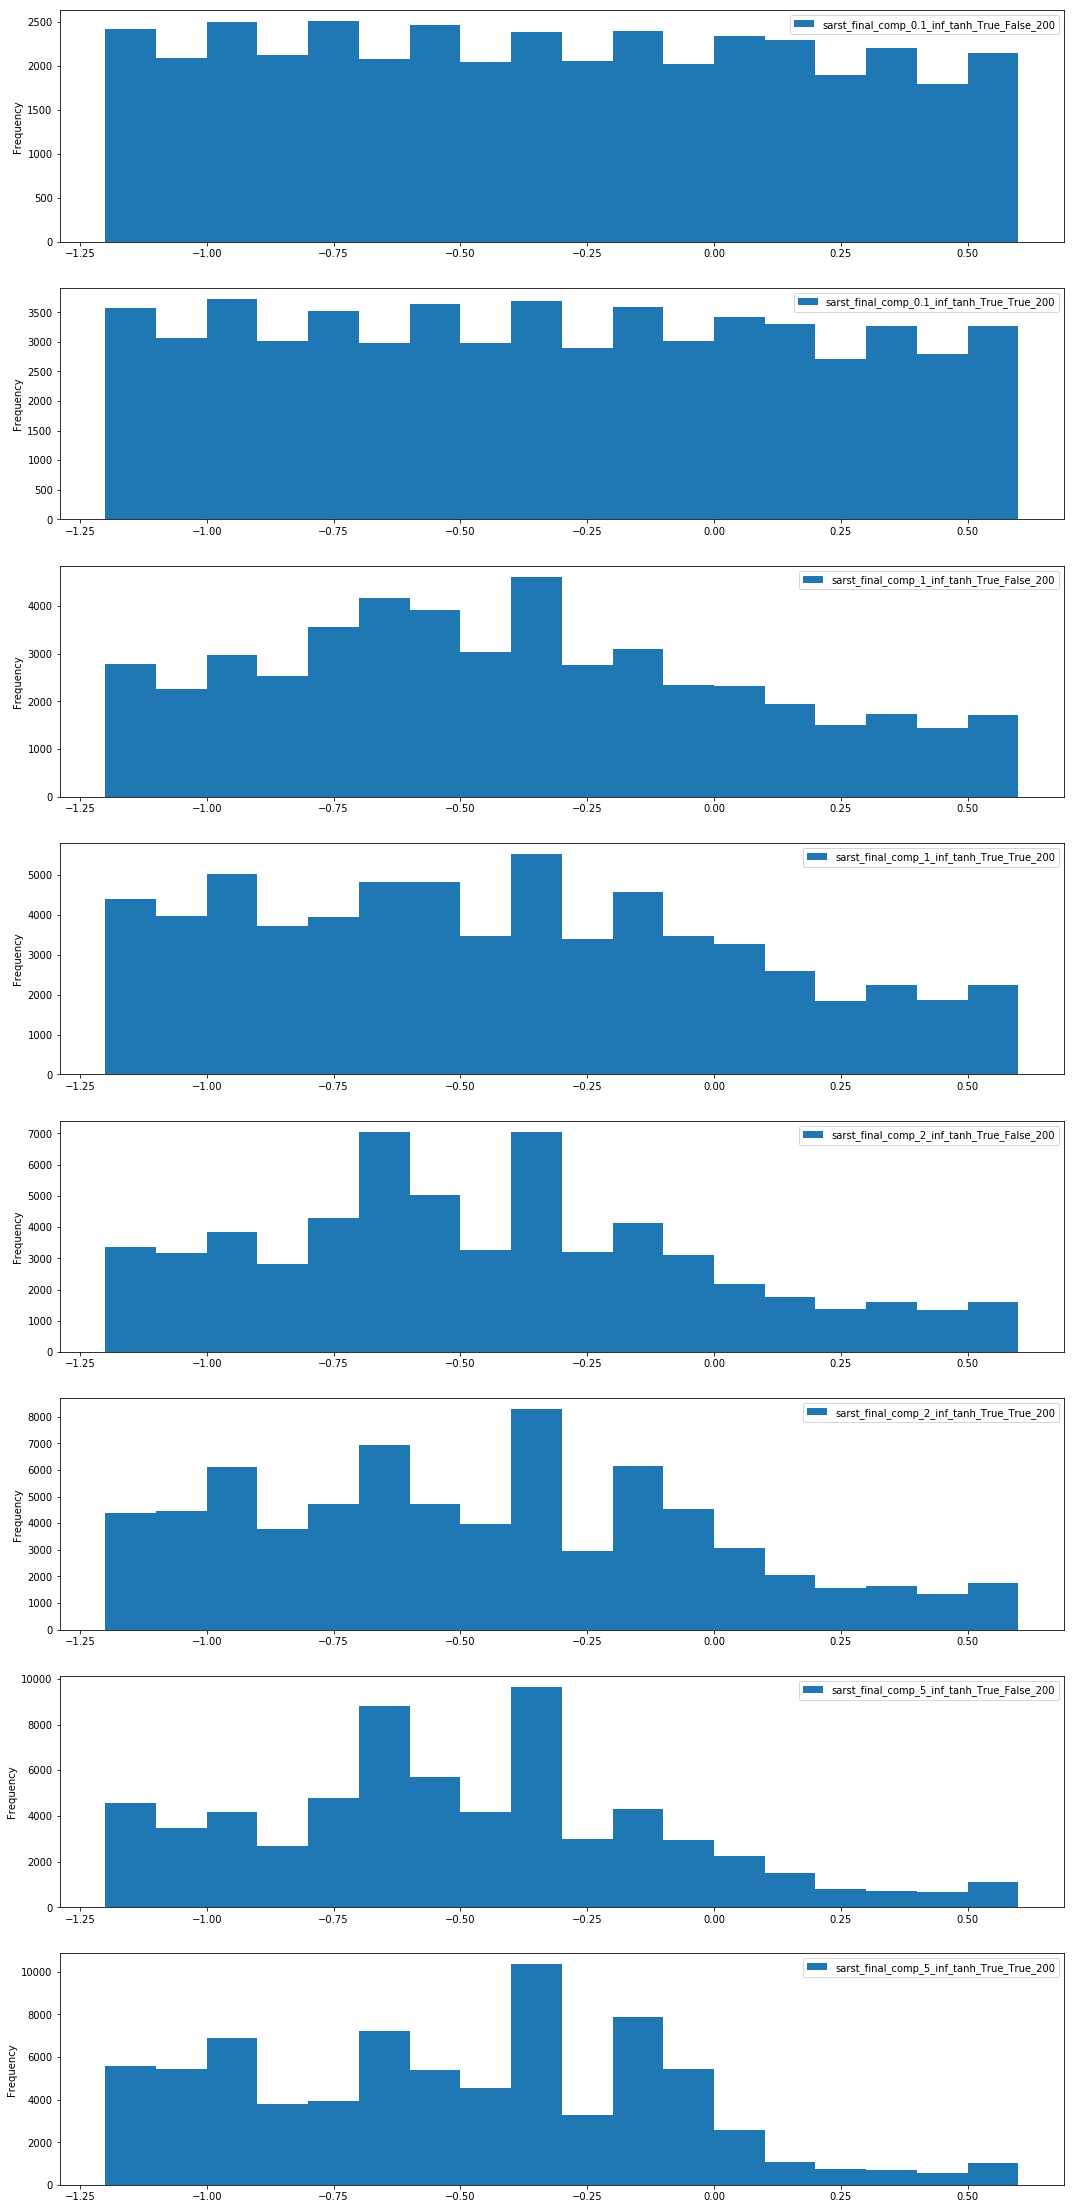

In [43]:
fig, axes = plt.subplots(8, figsize=(18,40))
for i, (name, g) in enumerate(expe_res_episodes.groupby('params')):
    g.plot(x='Train step', y='Goal', label=name, ax=axes[i], kind='hist', bins=18)